<a href="https://colab.research.google.com/github/nravinuthala/EVA4.0/blob/master/Assignment8/S8_Nagaraj_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Changes to be made
1. change the code such that it uses GPU -- Done
2. change the architecture to C1C2C3C40 (basically 3 MPs) -- Done
3. total RF must be more than 44 -- Done
4. one of the layers must use Depthwise Separable Convolution -- Done
5. one of the layers must use Dilated Convolution -- Done
6. use GAP (compulsory):- add FC after GAP to target #of classes (optional) -- Done
7. achieve 80% accuracy, as many epochs as you want. Total Params to be less than 1M. -- Done
8. upload to Github -- Done
9. Attempt S7-Assignment Solution -- Done

In [1]:
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/EVA4.0/Phase1/Session8')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from models import resnet, my_model
import cifar10_data_provider, my_trainer

In [3]:
train, test, classes = cifar10_data_provider.download_data()
train_loader, test_loader = cifar10_data_provider.get_train_test_loaders(train, test)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


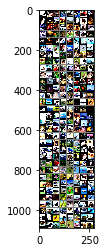

In [4]:
cifar10_data_provider.display(train_loader, classes)

In [5]:
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#model = my_model.Net().to(device)
model = resnet.ResNet18().to(device)

cuda


In [6]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [7]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
train_losses = []
test_losses = []
train_acc = []
test_acc = []
model = resnet.ResNet18().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)

EPOCHS = 30

my_trainer.run(model, device, train_loader, test_loader, optimizer, EPOCHS, train_losses, train_acc, test_losses, test_acc)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.1319588422775269 Batch_id=195 Accuracy=46.32: 100%|██████████| 196/196 [00:26<00:00,  7.34it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0123, Accuracy: 5763/10000 (57.63%)

EPOCH: 1


Loss=0.8752811551094055 Batch_id=195 Accuracy=64.43: 100%|██████████| 196/196 [00:26<00:00,  7.43it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 6625/10000 (66.25%)

EPOCH: 2


Loss=0.7076650857925415 Batch_id=195 Accuracy=72.89: 100%|██████████| 196/196 [00:26<00:00,  7.39it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 7086/10000 (70.86%)

EPOCH: 3


Loss=0.6265974044799805 Batch_id=195 Accuracy=77.60: 100%|██████████| 196/196 [00:26<00:00,  7.36it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 7121/10000 (71.21%)

EPOCH: 4


Loss=0.7112559676170349 Batch_id=195 Accuracy=80.91: 100%|██████████| 196/196 [00:26<00:00,  7.34it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7867/10000 (78.67%)

EPOCH: 5


Loss=0.5628387928009033 Batch_id=195 Accuracy=82.86: 100%|██████████| 196/196 [00:26<00:00,  7.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7868/10000 (78.68%)

EPOCH: 6


Loss=0.444837749004364 Batch_id=195 Accuracy=84.54: 100%|██████████| 196/196 [00:26<00:00,  7.43it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8018/10000 (80.18%)

EPOCH: 7


Loss=0.46374019980430603 Batch_id=195 Accuracy=86.04: 100%|██████████| 196/196 [00:26<00:00,  7.35it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 7837/10000 (78.37%)

EPOCH: 8


Loss=0.410480260848999 Batch_id=195 Accuracy=87.06: 100%|██████████| 196/196 [00:26<00:00,  7.39it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8352/10000 (83.52%)

EPOCH: 9


Loss=0.3674231171607971 Batch_id=195 Accuracy=88.25: 100%|██████████| 196/196 [00:26<00:00,  7.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8393/10000 (83.93%)

EPOCH: 10


Loss=0.2770037055015564 Batch_id=195 Accuracy=89.22: 100%|██████████| 196/196 [00:26<00:00,  7.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8356/10000 (83.56%)

EPOCH: 11


Loss=0.3072757124900818 Batch_id=195 Accuracy=89.79: 100%|██████████| 196/196 [00:26<00:00,  7.40it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8275/10000 (82.75%)

EPOCH: 12


Loss=0.30909958481788635 Batch_id=195 Accuracy=90.52: 100%|██████████| 196/196 [00:26<00:00,  7.33it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8424/10000 (84.24%)

EPOCH: 13


Loss=0.2812352180480957 Batch_id=195 Accuracy=91.22: 100%|██████████| 196/196 [00:26<00:00,  7.35it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8669/10000 (86.69%)

EPOCH: 14


Loss=0.28343790769577026 Batch_id=195 Accuracy=91.71: 100%|██████████| 196/196 [00:26<00:00,  7.40it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8622/10000 (86.22%)

EPOCH: 15


Loss=0.08793794363737106 Batch_id=195 Accuracy=92.15: 100%|██████████| 196/196 [00:26<00:00,  7.42it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8400/10000 (84.00%)

EPOCH: 16


Loss=0.19858531653881073 Batch_id=195 Accuracy=92.74: 100%|██████████| 196/196 [00:26<00:00,  7.39it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8658/10000 (86.58%)

EPOCH: 17


Loss=0.16162799298763275 Batch_id=195 Accuracy=93.03: 100%|██████████| 196/196 [00:26<00:00,  7.45it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8719/10000 (87.19%)

EPOCH: 18


Loss=0.16898182034492493 Batch_id=195 Accuracy=93.58: 100%|██████████| 196/196 [00:26<00:00,  7.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8812/10000 (88.12%)

EPOCH: 19


Loss=0.1366320252418518 Batch_id=195 Accuracy=93.83: 100%|██████████| 196/196 [00:26<00:00,  7.40it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8778/10000 (87.78%)

EPOCH: 20


Loss=0.37374231219291687 Batch_id=195 Accuracy=94.21: 100%|██████████| 196/196 [00:26<00:00,  7.42it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8873/10000 (88.73%)

EPOCH: 21


Loss=0.07502388954162598 Batch_id=195 Accuracy=94.55: 100%|██████████| 196/196 [00:26<00:00,  7.43it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8647/10000 (86.47%)

EPOCH: 22


Loss=0.17151561379432678 Batch_id=195 Accuracy=94.70: 100%|██████████| 196/196 [00:26<00:00,  7.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8830/10000 (88.30%)

EPOCH: 23


Loss=0.17313262820243835 Batch_id=195 Accuracy=95.03: 100%|██████████| 196/196 [00:26<00:00,  7.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8898/10000 (88.98%)

EPOCH: 24


Loss=0.1395912915468216 Batch_id=195 Accuracy=95.34: 100%|██████████| 196/196 [00:26<00:00,  7.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8815/10000 (88.15%)

EPOCH: 25


Loss=0.1205877810716629 Batch_id=195 Accuracy=95.71: 100%|██████████| 196/196 [00:26<00:00,  7.32it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8728/10000 (87.28%)

EPOCH: 26


Loss=0.07363530993461609 Batch_id=195 Accuracy=95.81: 100%|██████████| 196/196 [00:26<00:00,  7.33it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8907/10000 (89.07%)

EPOCH: 27


Loss=0.06971313059329987 Batch_id=195 Accuracy=96.11: 100%|██████████| 196/196 [00:26<00:00,  7.33it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8942/10000 (89.42%)

EPOCH: 28


Loss=0.12586337327957153 Batch_id=195 Accuracy=96.32: 100%|██████████| 196/196 [00:26<00:00,  7.28it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8884/10000 (88.84%)

EPOCH: 29


Loss=0.21592774987220764 Batch_id=195 Accuracy=96.37: 100%|██████████| 196/196 [00:26<00:00,  7.33it/s]



Test set: Average loss: 0.0041, Accuracy: 8952/10000 (89.52%)



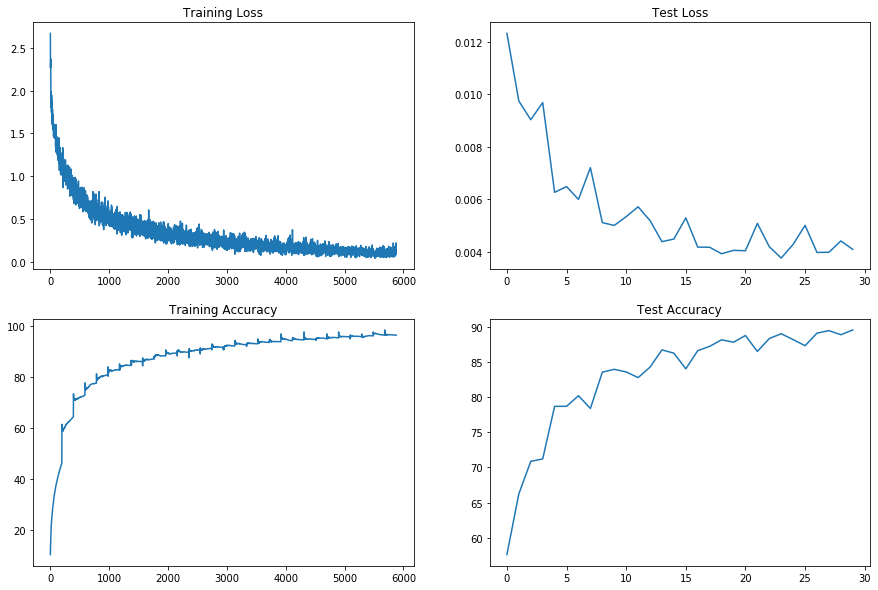

In [8]:
%matplotlib inline
my_trainer.plot(train_losses, train_acc, test_losses, test_acc)